# Tarea 3

**Envío del PR inicial:** viernes 21 de septiembre

**Aceptación del PR:** martes 25 de septiembre

## 1

Consideren el mapeo $F(x) = x^2-2$ definido en el intervalo $[-2,2]$. 

- ¿Qué podemos concluir después de muchos iterados para las condiciones iniciales $x_0=0$, $x_0=0.1$, $x_0=0.001$?
    
- ¿Qué propiedad hace que el interés en este mapeo sea el intervalo [-2,2]$


In [1]:
using Plots
using PyPlot
using LaTeXStrings
using Calculus
gr()

Plots.GRBackend()

In [2]:
doc"""
    Fμ(f, x0, n_iter)
Devuelve el vector `iterados` que incluye como componentes a la condicion inicial `x_0` y a los iterados obtenidos a partir de `x_0` evaluado en la función `F` 
"""
function Fμ(f, x0, n_iter::Int64=1000)

    iterados= [x0]    
    x_nn = x_n = x0
    
    for i in 1:n_iter
        x_nn = f(x_n)
        x_n = x_nn
        push!(iterados, x_nn)
    end
    
    return iterados
end

Fμ

In [3]:
F(x) = x^2 - 2

F (generic function with 1 method)

### (a) Condición inicial $x_0 = 0 $

In [4]:
Fμ(F, 0, 10000)

10001-element Array{Int64,1}:
  0
 -2
  2
  2
  2
  2
  2
  2
  2
  2
  2
  2
  2
  ⋮
  2
  2
  2
  2
  2
  2
  2
  2
  2
  2
  2
  2

 Para la condición $x_0 = 0$ observamos que a partir de $F^2$, $F(x) = 2$, es decir, que desde $F^2(x)$ hasta $F^{100}(x)$, $F(x) = 2$. Dicho de otra manera, el unico itereado diferente de 2 es el primer iterado $F^1(x)$

### (b) Condición inicial $x_0 = 0.1$

In [5]:
Fμ(F, 0.1, 10000)

10001-element Array{Float64,1}:
  0.1      
 -1.99     
  1.9601   
  1.84199  
  1.39293  
 -0.0597333
 -1.99643  
  1.98574  
  1.94317  
  1.77589  
  1.15379  
 -0.668772 
 -1.55274  
  ⋮        
 -0.18187  
 -1.96692  
  1.86879  
  1.49237  
  0.227155 
 -1.9484   
  1.79626  
  1.22657  
 -0.495532 
 -1.75445  
  1.07809  
 -0.837723 

### (c) Condición inicial $x_0 = 0.001$

In [33]:
Fμ(F, 0.001, 10000)

10001-element Array{Float64,1}:
  0.001   
 -2.0     
  2.0     
  1.99998 
  1.99994 
  1.99974 
  1.99898 
  1.99591 
  1.98364 
  1.93482 
  1.74353 
  1.03991 
 -0.918594
  ⋮       
 -0.354982
 -1.87399 
  1.51183 
  0.28563 
 -1.91842 
  1.68032 
  0.823468
 -1.3219  
 -0.25258 
 -1.9362  
  1.74888 
  1.05859 

## 2

Escriban una función cuyos argumentos son la función `F` del mapeo, `x0`, la condición inicial, y `n` el número de iterados del mapeo (un número entero), que genere los `n` iterados del mapeo y haga el análisis gráfico descrito del mapeo. Ilustren el funcionamiento con $F(x)=\sqrt{x}$.

¿Qué pueden concluir de iterar *muchas* veces una condición inicial?

In [34]:
doc"""
    mapeoitertivo(f, x0, n_iter)
Devuelve la n-ésima iteración de la función `f` a partir de la condición inicial $x_0$.

"""

function itera_mapeo(F, x0, n_iter=100)
    xnn = [x0]
    x = [x0]; y = [-10000.]
    for i in 1:n_iter
        xn = xnn[end]
        Fn = F(xn)
        push!(xnn, Fn)
        push!(x, xn)
        push!(y, Fn)
        push!(x, Fn)
        push!(y, Fn)
    end
    x_range = [minimum(x), maximum(x)+2]
    y_range = [minimum(y[2:end])-2, maximum(y)+2]
    xx = linspace(x_range[1], x_range[2], 1000)
    p = Plots.plot(xlim=x_range, ylim=y_range)
    Plots.plot!(xx, x -> F(x), label="F(x)")
    Plots.plot!(xx, x -> x, label="y=x")
    Plots.plot!(x, y, ls=:dash, marker=(3, .5, :dot), label="Trayectoria")
    xnn, p
end

itera_mapeo

## 3

- Usen el análisis gráfico para encontrar los puntos de periodo dos del mapeo $F(x) = x^2 -1.1$. Den explícitamente los puntos fijos.
    
- Usen el método de Newton, usando iterados iniciales  sagazmente seleccionados, para obtener los puntos fijos.

## 4

Hagan un análisis completo de las posibles órbitas de los siguientes mapeos, usando distintos colores para distintas órbitas. Interesa entre otras cosas saber cuántos puntos fijos tiene y cómo es la dinámica cerca de ésos puntos.

- $F_1(x) = \frac{1}{3x}$.

- $F_2(x) = -\frac{x^5}{5}$.

- $F_3(x) = \frac{x}{2}-2$.

Proponemos tres fuciones: (1) la función `random` genera un punto al azar en cualquier intervalo $[a,b]$, (2) la función `newton` encuentra las raíces de un polinomio, y finalmente, (3) la función `itera_mapeo!` permite realizar el análisis gráfico de distintas órbitas en una misma gráfica.

In [75]:
doc"""
    random(distancia, semidistancia)
Devuelve un número aleatorio entre el intervalo [a,b]. La primera componente de la funcion es la `distancia` entre `a` y `b`, mientras que la segunda componenete hace referencia a la `semidistancia` entre `a y `b`.
"""

function random(distancia, semidistancia)
    aleatorio = (distancia * rand()) - semidistancia
    return aleatorio
end 

random

In [76]:
doc"""
    newton(f, f', x0, n_iter)
Devuelve las raíces de la función `f`.

"""
function newton(f, fprime, x0, n_iter::Int64=1000)
    
    x_nn = x_n = x0
    for i in 1:n_iter
        x_nn = x_n - (f(x_n) / fprime(x_n))
        x_n = x_nn
    end
    return float(x_nn)
end

newton

In [77]:
doc"""
    mapeoitertivo(f, x0, n_iter)
Devuelve la n-ésima iteración de la función `f` a partir de la condición inicial $x_0$. Permite, además, realizar el análisis gráfico de múltiples órbitas con distintos puntos iniciales `x0` en un mapeo. 

"""

function itera_mapeo!(F, x0, n_iter=100)
    xnn = [x0]
    x = [x0]; y = [-10000.]
    for i in 1:n_iter
        xn = xnn[end]
        Fn = F(xn)
        push!(xnn, Fn)
        push!(x, xn)
        push!(y, Fn)
        push!(x, Fn)
        push!(y, Fn)
    end
    x_range = [minimum(x), maximum(x)+2]
    y_range = [minimum(y[2:end])-2, maximum(y)+2]
    xx = linspace(x_range[1], x_range[2], 1000)
    p = Plots.plot!(xlim=x_range, ylim=y_range)
    Plots.plot!(xx, x -> F(x), label="F(x)")
    Plots.plot!(xx, x -> x, label="y=x")
    Plots.plot!(x, y, ls=:dash, marker=(3, .5, :dot), label="Trayectoria")
    xnn, p
end

itera_mapeo!

### (a) $F_1(x) = \frac{1}{3x}$.

Definimos la función $F_1(x) = \frac{1}{3x}$ y su derivada $F1\prime(x) = -\frac{1}{3 x^2}$.

In [378]:
F1(x) = 1/3x

F1 (generic function with 1 method)

In [379]:
F1_prime(x) = -1/3(x^2)

F1_prime (generic function with 1 method)

Aplicando el método de Newton para obtener las raíces de $F_1(x) = \frac{1}{3x}$ tenemos que

In [380]:
cond_iniciales1 = -100:100
raices_F1 = []
for x0 in cond_iniciales1
    raiz = newton(F1, F1_prime, x0, 10000)
    push!(raices_F1, raiz)
end

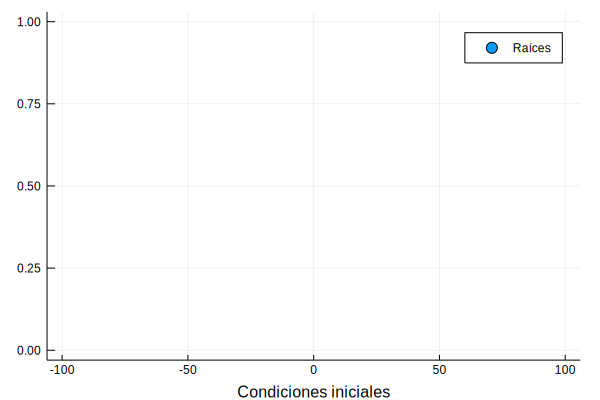

In [381]:
Plots.scatter(cond_iniciales1, raices_F1, label="Raíces", xlabel="Condiciones iniciales")
#hline!([0], label="Raíz exacta h=0", lw=2)

In [382]:
raices_F1

201-element Array{Any,1}:
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
   ⋮
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN

Debido a que no se encontraron raíces reales que den solución a $F1(x)$, se deduce que el mapedo $F_1(x) = \frac{1}{3x}$ no presenta puntos fijos, es decir, que las órbitas de distintos puntos iniciales no convergerán ni divergirán hacia un punto $x0$ en el análisis gráfico del mapeo. Alaizaremos, entonces, por casos, las distintas órbitas del mapeo.

#### (a.1) Caso 1: $x>0$

In [383]:
xnn_F11, p_11 = itera_mapeo(F1, random(50,0), 100)

([18.439, 0.0180777, 18.439, 0.0180777, 18.439, 0.0180777, 18.439, 0.0180777, 18.439, 0.0180777  …  0.0180777, 18.439, 0.0180777, 18.439, 0.0180777, 18.439, 0.0180777, 18.439, 0.0180777, 18.439], Plot{Plots.GRBackend() n=3})

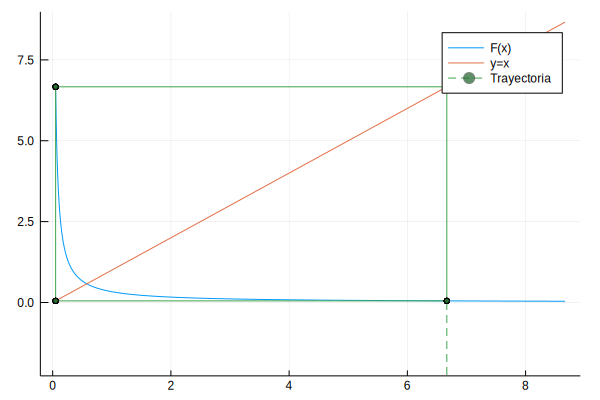

In [377]:
p_11
#Plots.savefig(p_11, "Orbita_11")

A continuación se muestran algunas de las distintas órbitas que pueden generarse por diferentes puntos iniciales positivos.

$x0=0.0001$
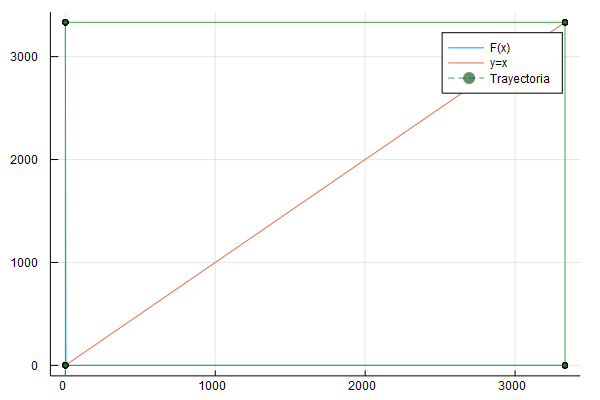

$x0=0.1$
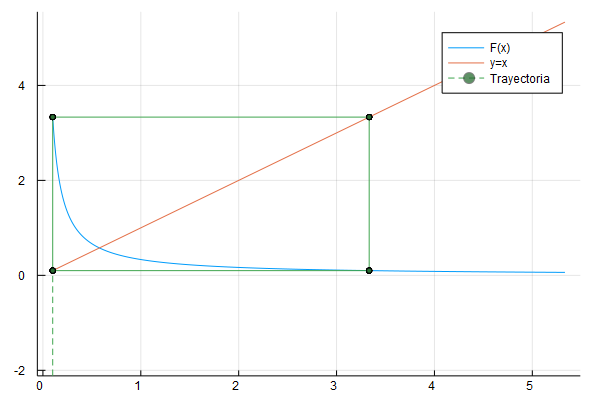

$x0=0.3$
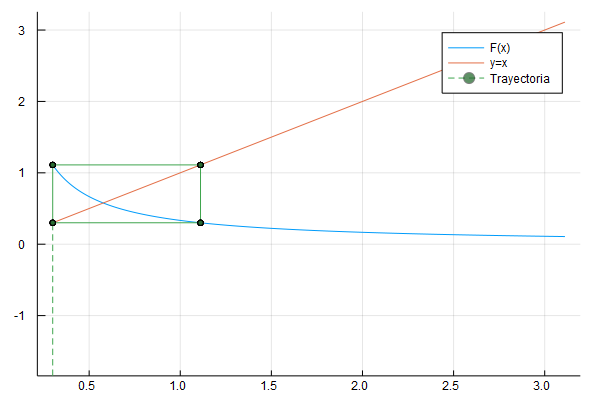

$x0=0.6$
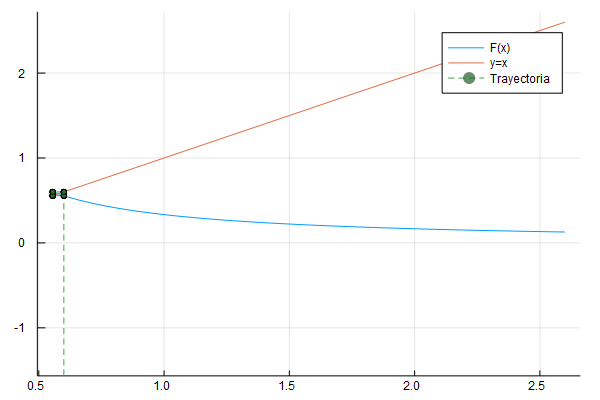

$x0=0.07$
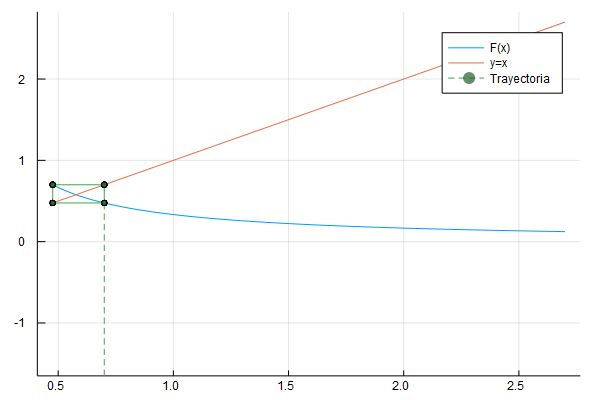

$x0=1.0$
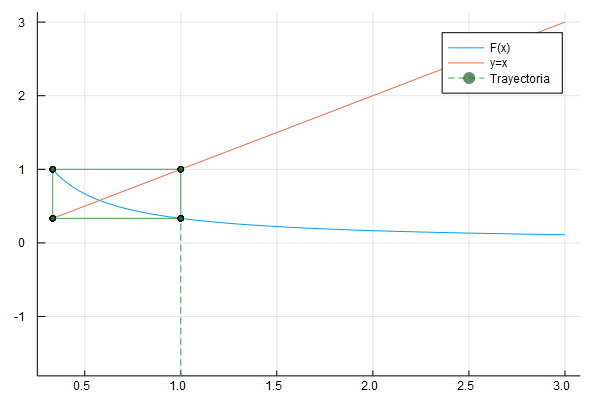

$x0=10.0$
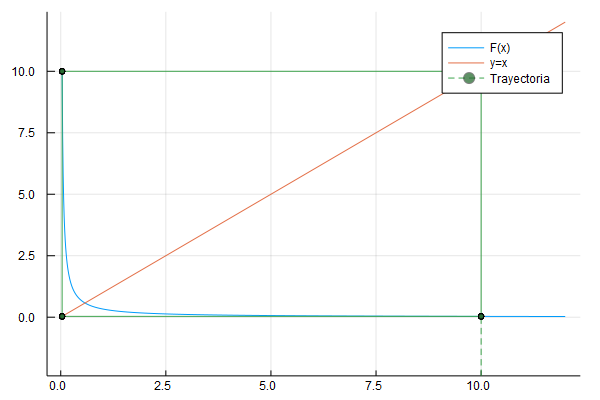

$x0=100.0$
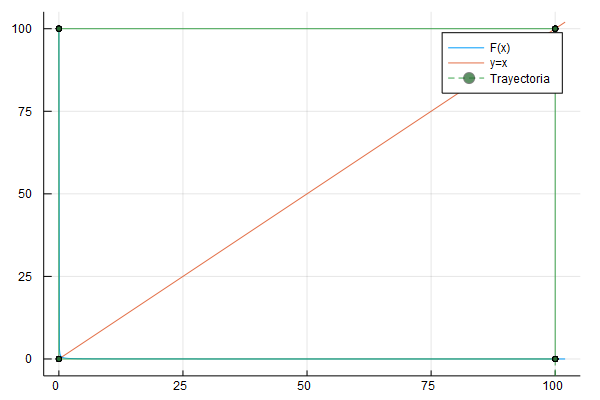


#### (a.2) Caso 2: $x=0$

Este caso "no genera" resultados, pues cuando el punto incial $x0=0$, el mapeo se indetermina y no de genera órbita alguna.

#### (a.3) Caso 3: $x<0$

El caso para el cual el punto inicial $x<0$,  es análogo al caso 1. Las órbitas con puntos inciales negativos pueden considerarse como "un reflejo" (sobre el eje x) de las órbitas con puntos inciales positivos.

In [384]:
xnn_F13, p_13 = itera_mapeo(F1, -0.0001, 100)
#xnn_F13, p_13 = itera_mapeo(F1, -random(50,0), 100)

([-0.0001, -3333.33, -0.0001, -3333.33, -0.0001, -3333.33, -0.0001, -3333.33, -0.0001, -3333.33  …  -3333.33, -0.0001, -3333.33, -0.0001, -3333.33, -0.0001, -3333.33, -0.0001, -3333.33, -0.0001], Plot{Plots.GRBackend() n=3})

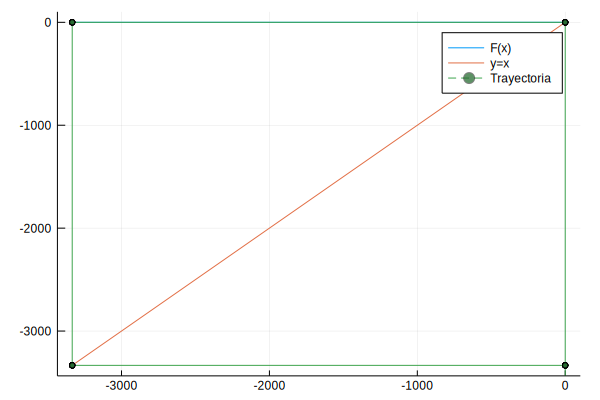

In [385]:
p_13
#Plots.savefig(p_13, "Orbita_1-00001")

#### (a.4) Conclusiones

In [459]:
xnn_F12!, p_12! = itera_mapeo!(F2, 0.7, 100)

([0.7, -0.033614, 8.58284e-9, -9.31504e-42, 1.40267e-206, -0.0, 0.0, -0.0, 0.0, -0.0  …  -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0], Plot{Plots.GRBackend() n=12})

In [460]:
xnn_F13!, p_13! = itera_mapeo!(F2, -0.7, 100)

([-0.7, 0.033614, -8.58284e-9, 9.31504e-42, -1.40267e-206, 0.0, -0.0, 0.0, -0.0, 0.0  …  0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0], Plot{Plots.GRBackend() n=15})

In [463]:
xnn_F13_2!, p_13_2! = itera_mapeo!(F2, -random(10,0), 100)

([-0.249111, 0.000191864, -5.19995e-20, 7.60374e-98, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0  …  0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0], Plot{Plots.GRBackend() n=18})

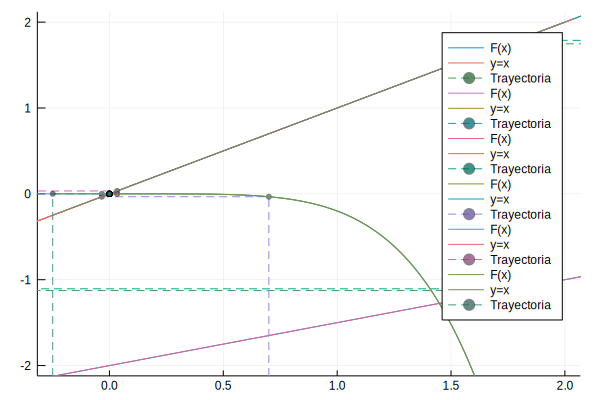

In [464]:
p_11
p_12!
p_13!
p_13_2!

[1] No existen puntos fijos en el análisis gráfico, ya que $F_1(x) = \frac{1}{3x}$ no tiene raíces reales. Por lo tanto, no hay punto atractores o repulsores. Por lo tanto, las órbitas no convergen a un punto fijo.

[2] Las orbitas observadas son siempre periódicas en un periodo de 4, tal y como se puede observar en los Casos 1 y 2. Al ser periódicas, si el númeroo de iteraciones sobrepasa el período de la orbita, entonces el número de iteraciones del mapeo no afecta el análisis gráfico. 

Adicionalmente, cada órbita varía de acuerdo con el valor que adquiera el punto inicial: 

   - Valores muy cercanos a 0 (tanto positivos como negativos) generan órbitas "bastante grandes" como es el caso de $x0 = 0.0001, -0.0001$
    
   - Valores en el intervalo $[0.1,1]$ generan órbitas variables cuyas trayectorias siempre presentan valores mayores a $0$ como su segunda cordenada. 
    
   - Valores superiores a 1 generan órbitas variables cuyas trayectorias siempre presentan en las componentes de sus coordenadas al $0$ o al valor del $x0$ usado como punto inicial (es decir que los puntos en su órbita tienen por coordenadas $(0, 0)$, $(0, x0)$, $(x0, 0)$, $(x0, x0)$). Las "amplitud" (o "el tamaño") de la trayectoria de la órbita depende del valor del punto inicial, pues si el punto incial "aumenta", también lo hará el "tamaño" de la órbita.
   
   - Los tres puntos anteriores que describen las diferentes órbitas del mapeo $F1(x)$ cuando el punto inicial es positivo son totalmente análogos para los caso cuando el punto inicial toma valores negativos. Las órbitas con puntos inciales negativos pueden considerarse como "un reflejo" (sobre el eje x) de las órbitas con puntos inciales positivos.

### (b) $F_2(x) = -\frac{x^5}{5}$.

Definimos la función $F_2(x) = -\frac{x^5}{5}$ y su derivada $F_2\prime(x) = -x^4$.

In [389]:
F2(x) = - x^5 / 5

F2 (generic function with 1 method)

In [390]:
F2_prime(x) = - x^4

F2_prime (generic function with 1 method)

Utilizamos el método de Newton (función `newton`) para encontrar las raíces de $F2(x)$ y utilizarlas como puntos iniciales en el mapeo de la órbita. Debido a que $F2(x)$ es de orden 5, se esperan encontrar 5 raíces que den solucion al polinomimo.

In [391]:
cond_iniciales2 = -10:0.25:10
raices_F2 = []
for x0 in cond_iniciales2
    raiz = newton(F2, F2_prime, x0, 10000)
    push!(raices_F2, raiz)
end

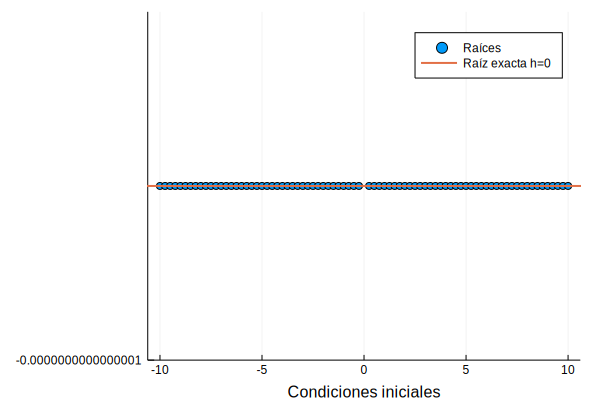

In [392]:
Plots.scatter(cond_iniciales2, raices_F2, label="Raíces", xlabel="Condiciones iniciales")
hline!([0], label="Raíz exacta h=0", lw=2)

Por lo tanto, se obtuvo que $F_2(x) = -\frac{x^5}{5}$ sólo tiene como raíz real a $x = 0$, mientras que las 4 raíces restanstes son raíces complejas. Utilizaremos solamente como punto incial $x0 = 0$ como punto inicial para el mapeo.

Asimsimo, el mapeo de $F_2(x) = -\frac{x^5}{5}$, al contener a la variable `x` elevada a la quinta potencia, adquiere valores bastante grandes (ya sea para x positiva, $x>1$, o para x negativa, $x>1$). Por este motivo, la órbita del mapeo solamente está definida en el intervalo $(-1.5, 1.5)$ pues si `x` adquiere valores superiores a 1.5 o inferiores a 1.5, el mapeo $F_2(x) = -\frac{x^5}{5}$ adquiere valores demasiado grandes, de manera que son interpretados como $Inf$ o $-Inf$.

Analizando 3 casos para el valor del $x0$ que será usado como punto incial tenemos que:

#### (b.1) Caso 1: $-1.5 < x < 0$

In [393]:
x_01 = - random(1.5, 0)

xnn_F21, p_21 = itera_mapeo(F2, x_01, 100)

([-0.844396, 0.0858541, -9.32902e-7, 1.41322e-31, -1.12741e-155, 0.0, -0.0, 0.0, -0.0, 0.0  …  0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0], Plot{Plots.GRBackend() n=3})

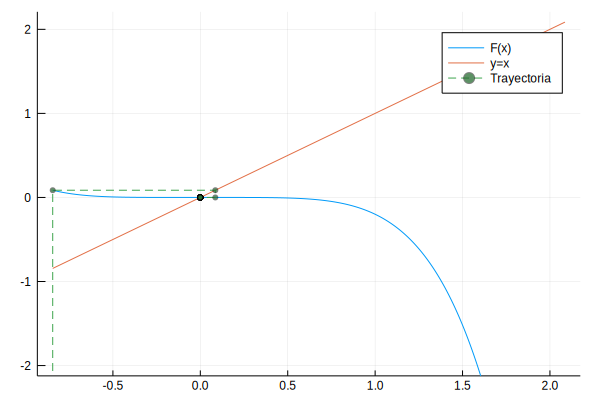

In [394]:
p_21
#Plots.savefig(p_21, "Atractor_Neg3_F2.png")

Se muestran a continuación mapeos adicionales para el caso $-1.5 < x < 0$

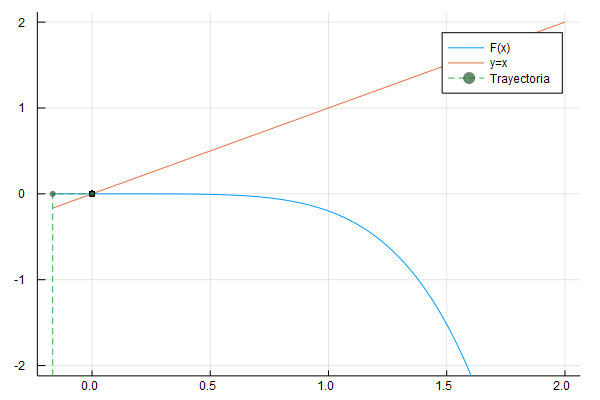 

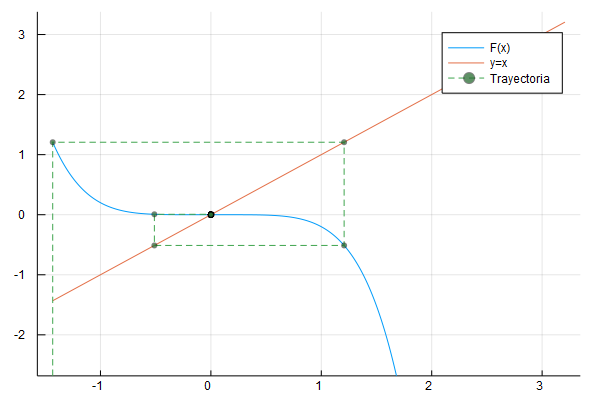

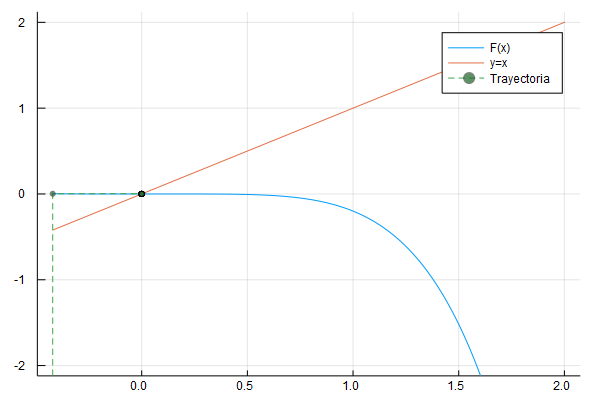

#### (b.2) Caso 2: $x = 0$

En este caso, $x0 = 0$ es un punto fijo, pues en el análisis gráfico, la órbita esta compuesta únicamente por un punto. 

In [395]:
xnn_F22, p_22 = itera_mapeo(F2, 0, 100)

([0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0], Plot{Plots.GRBackend() n=3})

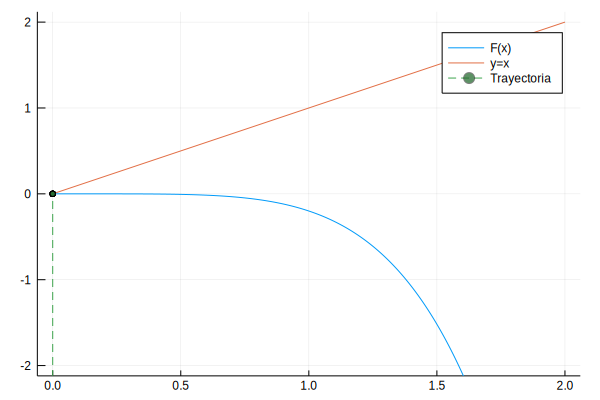

In [396]:
p_22

#### (b.3) Caso 3: $0 < x < 1.5$

In [397]:
x_03 = random(1.5, 0)

xnn_F23, p_23 = itera_mapeo(F2, x_03, 100)

([0.779673, -0.0576225, 1.27055e-7, -6.6219e-36, 2.5465e-177, -0.0, 0.0, -0.0, 0.0, -0.0  …  -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0], Plot{Plots.GRBackend() n=3})

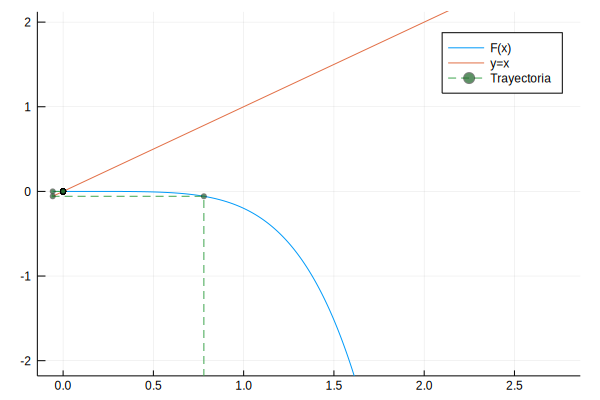

In [398]:
p_23
#Plots.savefig(p_23, "Atractor_pos3_F2")

Se muestran a continuación mapeos adicionales para el caso $0 < x < 1.5$
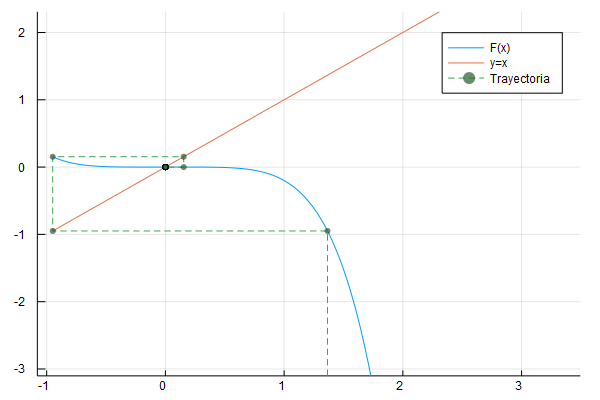

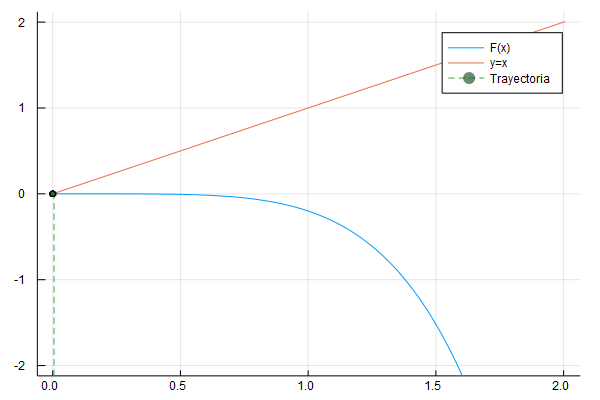

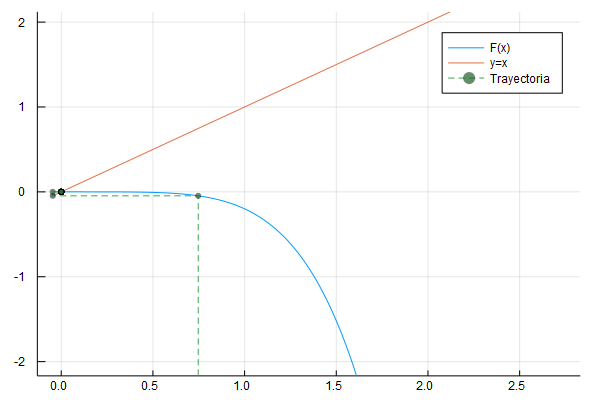

#### (b.4) Conclusiones

[1] A partir de la funcion `newton` (y de las gráficas generadas con los resultados), se obtuvo que solo una de las 5 raíces de $F_2(x) = -\frac{x^5}{5}$ es real. El punto $x0 = 0$, además de ser la raíz real de $F_2(x) = -\frac{x^5}{5}$, juega el papel de punto fijo en la órbita del mapeo. Con el análisis gráfico en los tres casos presentados anteriormente, se observa que las distintas órbitas mapeadas convergen al punto fijo $x0 = 0$, por lo que se concluye que es un atractor.

In [465]:
xnn_F22, p_22! = itera_mapeo!(F2, 0, 100)

([0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0], Plot{Plots.GRBackend() n=21})

In [466]:
xnn_F23, p_23! = itera_mapeo!(F2, x_03, 100)

([0.779673, -0.0576225, 1.27055e-7, -6.6219e-36, 2.5465e-177, -0.0, 0.0, -0.0, 0.0, -0.0  …  -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0], Plot{Plots.GRBackend() n=24})

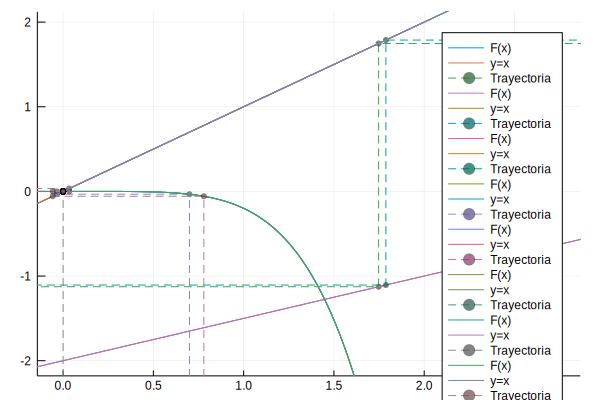

In [467]:
p_21
p_22!
p_23!

### (c) $F_3(x) = \frac{x}{2}-2$.

Definimos la función $F_3(x) = \frac{x}{2}-2$ y su derivada $F_3\prime(x) = 2X$.

In [401]:
F3(x) = x/2 - 2

F3 (generic function with 1 method)

In [436]:
F3_prime(x) = 1/2

F3_prime (generic function with 1 method)

Utilizamos el método de Newton (función `newton`) para encontrar las raíces de $F3(x)$ y utilizarlas como puntos iniciales en el mapeo de la órbita. Gracias a que $F3(x)$ es un polinomio de orden 3, se esperan encontrar 2 raíces que den solución al polinomimo.

In [437]:
cond_iniciales3 = -50:50
raices_F3 = []
for x0 in cond_iniciales3
    raiz = newton(F3, F3_prime, x0, 10000)
    push!(raices_F3, raiz)
end

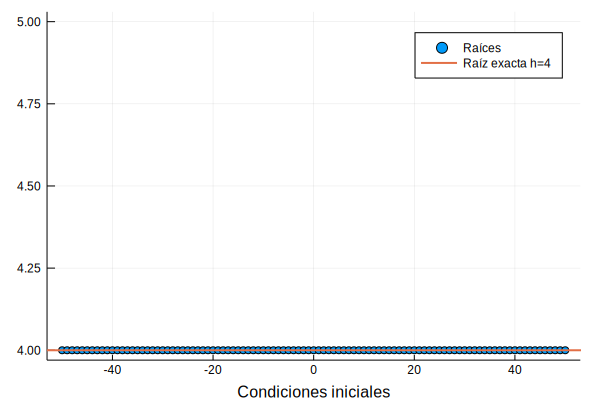

In [438]:
Plots.scatter(cond_iniciales3, raices_F3, label="Raíces", xlabel="Condiciones iniciales")
hline!([4], label="Raíz exacta h=4", lw=2)

In [439]:
unique(raices_F3)

1-element Array{Float64,1}:
 4.0

Usando `newton` obtenemos que la raíz de $F_3(x) = \frac{x}{2}-2$ es $4$. Analizamos entonces 3 casos:

#### (c.1) Caso 1: $x < -4$

In [450]:
xnn_F31, p_31 = itera_mapeo(F3, -random(50,0), 100)

([-42.2548, -23.1274, -13.5637, -8.78185, -6.39093, -5.19546, -4.59773, -4.29887, -4.14943, -4.07472  …  -4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0], Plot{Plots.GRBackend() n=3})

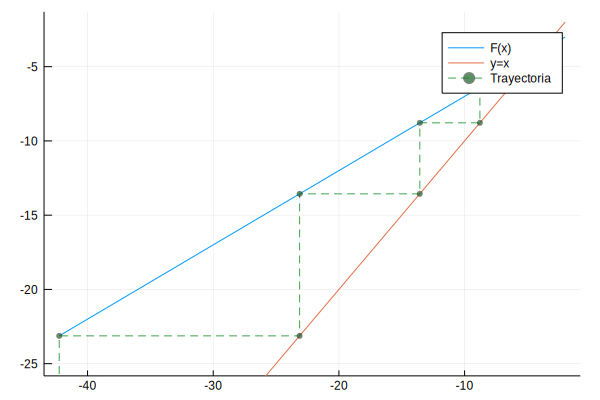

In [451]:
p_31

#### (c.2) Caso 2: $x = -4$

In [453]:
xnn_F32, p_32 = itera_mapeo(F3, -4.0, 100)

([-4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0  …  -4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0], Plot{Plots.GRBackend() n=3})

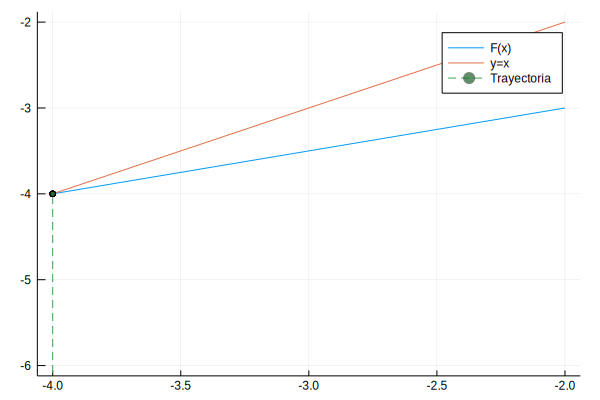

In [454]:
p_32

#### (c.3) Caso 3: $x < -4$

In [455]:
xnn_F33, p_33 = itera_mapeo(F3, random(50,0), 100)

([41.9806, 18.9903, 7.49516, 1.74758, -1.12621, -2.56311, -3.28155, -3.64078, -3.82039, -3.91019  …  -4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0], Plot{Plots.GRBackend() n=3})

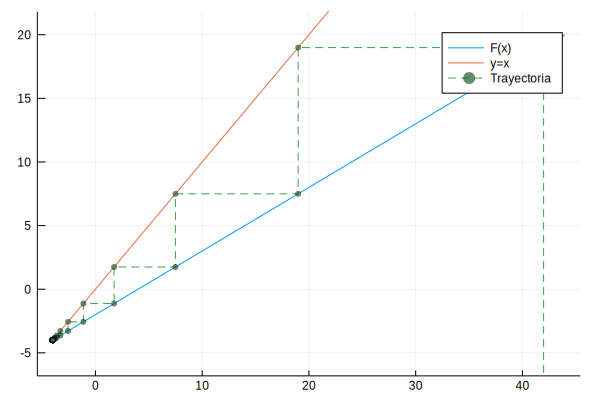

In [456]:
p_33

#### (c.4) Conclusiones

In [468]:
xnn_F32!, p_32! = itera_mapeo!(F3, -4.0, 100)

([-4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0  …  -4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0], Plot{Plots.GRBackend() n=27})

In [469]:
xnn_F33!, p_33! = itera_mapeo!(F3, random(50,0), 100)

([39.3945, 17.6973, 6.84863, 1.42431, -1.28784, -2.64392, -3.32196, -3.66098, -3.83049, -3.91525  …  -4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0], Plot{Plots.GRBackend() n=30})

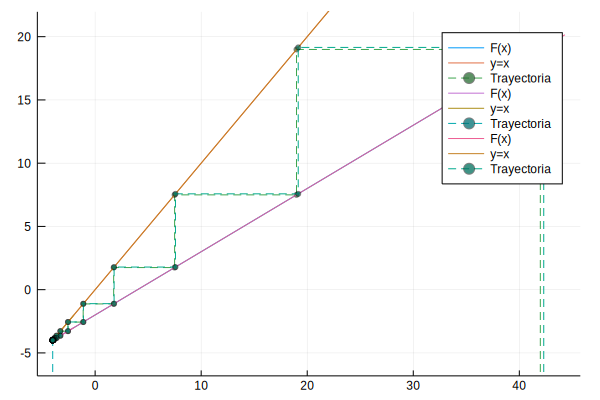

In [458]:
p_31
p_32!
p_33!

[1] El punto $x0=-4$ es un punto fijo como puede observarse en el caso 2.

[2] Para el caso 1, cuando $x>-4$, las órbitas convergen hacia el punto fijo, disminuyendo su valor con cada iteración hasta alcanzar un valor de $-4$.

[3] Para el caso 3, cuando $x<-4$, las órbitas convergen hacia el punto fijo, aumentando su valor con cada iteración hasta alcanzar un valor de $-4$.

[4] Por lo tanto, se concluye que el mapeo $F_3(x) = \frac{x}{2}-2$ es un atractor. 

## 5

- Para el mapeo $F(x) = x^2-2$ en el intervalo $[-2,2]$ (ejercicio 1), consideren un punto al azar en el intervalo $[-2,2]$ y construyan una órbita muy larga, por ejemplo, de $20\,000$ iterados. Obtengan el histograma de frecuencia (normalizado) de visita de los puntos de la órbita. ¿Qué conclusión podemos sacar de este histograma?

- Repitan el inciso anterior para el mapeo: $G(x) = 2x \mod 1$ en el intervalo [0,1].

(NOTA: En cuanto al histograma, pueden construir su propia función que haga el histograma, o buscar en las entrañas de la documentación.)

### (a) Mapeo $F(x) = x^2-2$ en el intervalo $[-2,2]$

Puesto que la función $F(x) = x^2-2$ fue definida en el ejercicio 1, se procederá a obtener un punto aleatorio en el intervalo $[-2,2]$ haciendo uso de la función `random`, para posteriormente generar una órbita de $20\,000$ iterados utilizando para ello la función `F\mu`.

In [167]:
x_aleatorio_1 = random(4, 2)

iterados_aleatorios_1 = Fμ(F, x_aleatorio_1, 20000)

0.258654819062075

In [153]:
#h_1= histogram(iterados_aleatorios, nbins=length(iterados_aleatorios));
#savefig(h, "histograma.png")

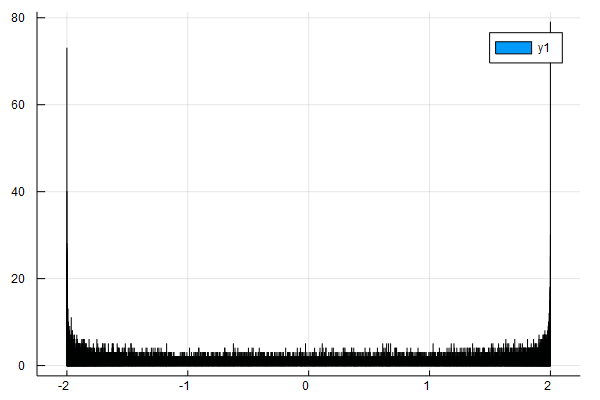

In [78]:
h_norm_1 = PyPlot.plt[:hist](iterados_aleatorios_1, normed=true, bins=100);
#grid("on")
xlabel("Puntos de la órbita")
ylabel("Número de visitas en cada punto de de la órbita")
title("Distribución de la frecuencia de visitas de la órbita en cada punto")

LoadError: [91mUndefVarError: iterados_aleatorios_1 not defined[39m

La información y documentación requerida para gráficar histogramas fue obtenida del sitio web http://nbviewer.jupyter.org/github/gizmaa/Julia_Examples/blob/master/pyplot_histogram.ipynb (una extensión del notebook https://gist.github.com/gizmaa/7214002).

Algunas conclusiones obtenidas a partir del análisis del mapeo de $F(x) = x^2-2$ en el intervalo $[-2,2]$ son:

[1] El histograma muestra la frecuencia de visitas (u ocurrencia) de cada uno de los puntos de la órbita generada por el mapeo de $F(x) = x^2-2$. Esto significa que aquellos puntos con una mayor frecuencia de visitas (o una mayor ocurrencia), como es el caso de los puntos $x0 = 2, -2$ en el presente histograma, "fueron obtenidos una mayor cantidad de veces" por el mapeo $F(x) = x^2-2$. Por lo tanto, se concluye que los puntos de la órbita $x0 = 2, -2$ son puntos del mapeo $F(x) = x^2-2$

[2] Debido a que el primer punto usado como condición inicial fue tomado al azar en el intervalo $[-2,2]$, la distribucion obtenida en el histograma representa la tendencia "que sigue" la órbita del mapeo independientemente de la condición inicial a partir de la cual se comenzó a iterar. 

[3] Del mismo modo, se observa que a partir de cierto número `n` de iterados,  la distribución del histograma (es decir, la frecuencia de visitas para cada uno de los puntos de la órbita) será en escencia la misma para cualquier número de iterados mayor o igual a `n` que se elija.

### (a) Mapeo $G(x) = 2x \mod 1$ en el intervalo [0,1]

Para analizar el mapeo de Definiendo la función $G(x) = 2x\mod1$

In [31]:
G(x) = mod(2x, 1)

G (generic function with 1 method)

In [32]:
iterados_aleatorios_2 = Fμ(G, rand(), 500)

501-element Array{Float64,1}:
 0.244837
 0.489673
 0.979346
 0.958692
 0.917384
 0.834768
 0.669537
 0.339073
 0.678146
 0.356293
 0.712585
 0.425171
 0.850342
 ⋮       
 0.0     
 0.0     
 0.0     
 0.0     
 0.0     
 0.0     
 0.0     
 0.0     
 0.0     
 0.0     
 0.0     
 0.0     

In [33]:
#h_2= histogram(iterados_aleatorios_2, nbins=length(iterados_aleatorios_2))
#Plots.savefig(h_2, "histograma2_1.png")

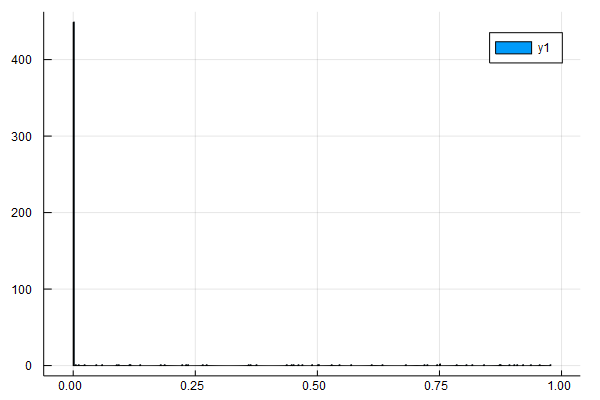

Se muestra el histograma del mapeo de $G(x) = 2x \mod1$ cuyos numero de iterados es 500. 

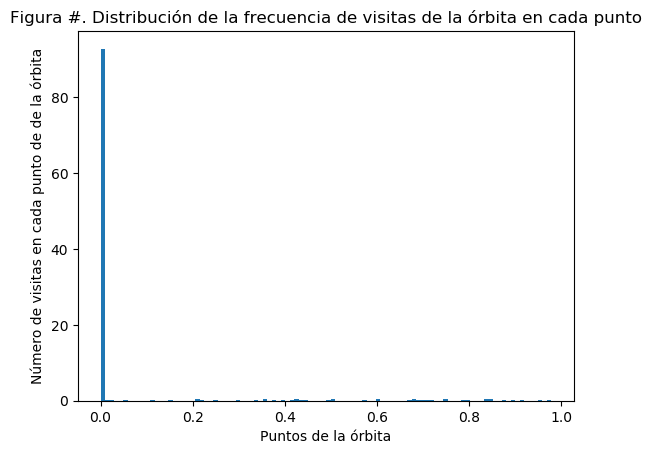

PyObject Text(0.5,1,'Figura #. Distribución de la frecuencia de visitas de la órbita en cada punto')

In [34]:
h_norm_2 = PyPlot.plt[:hist](iterados_aleatorios_2, normed=true, bins=100);
xlabel("Puntos de la órbita")
ylabel("Número de visitas en cada punto de de la órbita")
title("Figura #. Distribución de la frecuencia de visitas de la órbita en cada punto")

La información y documentación requerida para gráficar histogramas fue obtenida del sitio web http://nbviewer.jupyter.org/github/gizmaa/Julia_Examples/blob/master/pyplot_histogram.ipynb (extensión del notebook https://gist.github.com/gizmaa/7214002).

## 6

Analicen los mapeos

- F(x) = x^2,

- F(x) = x^3,

- F(x) = -x^3,

que se satisface $F(0) = F'(0) = 0$. ¿Qué podemos decir de la convergencia?

## 7

Analicen los mapeos

- $F(x) = x$,

- $F(x) = -x$,

- $F(x) = x-x^2$,

que se satisface $F(0) = 0$ y $|F'(0)| = 1$. (Este tipo de puntos son *neutralmente* atractivos o repulsivos.) ¿Qué podemos decir de la convergencia?

### (a) Mapeo $F(x) = x$

In [35]:
F71(x) = x

F71 (generic function with 1 method)

In [36]:
F71prime(x) = 1

F71prime (generic function with 1 method)

In [42]:
H71(x) = F71(x) - x

H71 (generic function with 1 method)

In [43]:
H71prime(x) = F71prime(x) - 1

H71prime (generic function with 1 method)

In [47]:
x0 = 1

newton(x -> F71(x) - x, x -> F71prime(x) - 1, x0, 100)

NaN

In [ ]:
itera_mapeo()

### (b) Mapeo $F(x) = -x$

### (c) Mapeo $F(x) = x-x^2$

In [ ]:
x0 = 1

newton(x -> F71(x) - x, x -> F71prime(x) - 1, x0, 100)

## 8

En el ejercicio 3, implementaron el análisis gráfico (y el método de Newton) para encontrar los puntos de periodo dos del mapeo $F(x) = x^2 -1.1$. Usen el módulo de duales para mostrar la estabilidad de esos puntos.